#### 

Q2: The demand and usage of the internet is growing across the globe and public wifi is
becoming a new normal as we move forward. Wifi providers want to optimize the cost while
providing the free and paid wifi. The use case here refers to public WiFi hotspots in New York
City. Please refer to the dataset – Wifi Data.xlsx
● The information comprises of records for every public WiFi hotspot (ones provided by or
in partnership with the city) in New York City.
Using Python’s Pandas and Seaborn library to answer following business questions.
- 1) Get the data provided, check frequency distribution of the features, drop irrelevant and
redundant features if any and state your inferences?


2) Using appropriate data visualization answer the following:
- a. Plot the providers vs number of all wi-fi hotspots they have in operation? Who has
the highest installations?
- b. Plot providers vs number of free wifi hotspots.
- c. Are there any provider(s) who do not provide free wifi?
- d. Which Location type (Location_T) are most common and least common?
- e. How many free “indoor” and “outdoor” hotspots are there? Which companies have
the highest number of Outdoor Free installations. 

In [22]:
# import pandas lib as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.precision", 3)
pd.set_option('display.min_rows', 8)
pd.set_option('display.width', 2000)
 

In [2]:
df_wifi = pd.read_excel('Wifi Data.xlsx')

In [3]:
df_wifi

,OBJECTID,Borough,Type,Provider,Latitude,Longitude,Location_T,City,BoroCode,NTACode
0,1,BK,Limited Free,ALTICEUSA,40.658,-73.944,Outdoor,Brooklyn,3,BK60
1,2,BK,Limited Free,ALTICEUSA,40.658,-73.947,Outdoor,Brooklyn,3,BK60
2,3,BK,Limited Free,ALTICEUSA,40.658,-73.947,Outdoor,Brooklyn,3,BK60
3,4,BK,Limited Free,ALTICEUSA,40.657,-73.947,Outdoor,Brooklyn,3,BK60
...,...,...,...,...,...,...,...,...,...,...
2562,2563,MN,Free,LinkNYC - Citybridge,40.750,-73.988,Outdoor Kiosk,New York,1,MN17
2563,2564,MN,Free,LinkNYC - Citybridge,40.755,-73.984,Outdoor Kiosk,New York,1,MN17
2564,2565,MN,Free,LinkNYC - Citybridge,40.762,-73.975,Outdoor Kiosk,New York,1,MN17
2565,2566,MN,Free,LinkNYC - Citybridge,40.775,-73.982,Outdoor Kiosk,New York,1,MN14


#### Task 1 - Exploring the features and dropping irrelevant ones if any

In [4]:
#The info command suggests that there are no null values and the data types are as per the nature of the data
df_wifi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2566 entries, 0 to 2565
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    2566 non-null   int64  
 1   Borough     2566 non-null   object 
 2   Type        2566 non-null   object 
 3   Provider    2566 non-null   object 
 4   Latitude    2566 non-null   float64
 5   Longitude   2566 non-null   float64
 6   Location_T  2566 non-null   object 
 7   City        2566 non-null   object 
 8   BoroCode    2566 non-null   int64  
 9   NTACode     2566 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 200.6+ KB


In [6]:
#Exploring individual features

df_wifi['Borough'].value_counts()


MN    1204
BK     595
QU     415
BX     257
SI      95
Name: Borough, dtype: int64

In [7]:
df_wifi['Type'].value_counts()

Free            1983
Limited Free     581
Partner Site       2
Name: Type, dtype: int64

In [8]:
df_wifi['Provider'].value_counts()

LinkNYC - Citybridge       1134
SPECTRUM                    343
Transit Wireless            276
ALTICEUSA                   237
Harlem                      128
Downtown Brooklyn           100
NYPL                         90
QPL                          65
BPL                          59
Manhattan Down Alliance      36
Chelsea                      30
NYCHA                        28
AT&T                         27
City Tech                    11
Partner                       2
Name: Provider, dtype: int64

In [10]:
df_wifi['Location_T'].value_counts()

Outdoor Kiosk         1134
Outdoor                696
Subway Station         276
Library                214
Indoor                 125
Outdoor TWC Aerial     121
Name: Location_T, dtype: int64

In [11]:
df_wifi['City'].value_counts()

New York            1204
Brooklyn             595
Queens               350
Bronx                257
Staten Island         95
Flushing               9
Long Island City       8
Jamaica                5
Corona                 3
Bayside                3
Little Neck            2
Richmond Hill          2
Forest Hills           2
South Hollis           1
Rockaway Beach         1
Jackson Heights        1
Whitestone             1
College Point          1
Middle Village         1
Arverne                1
East Elmhurst          1
Ridgewood              1
South Ozone Park       1
Woodside               1
Cambria Heights        1
Briarwood              1
Rosedale               1
Howard Beach           1
Elmhurst               1
Laurelton              1
Ozone Park             1
Maspeth                1
Far Rockaway           1
Hollis                 1
Bellerose              1
Saint Albans           1
Glendale               1
Rockaway Park          1
Rego Park              1
Glen Oaks              1


In [13]:
df_wifi['NTACode'].value_counts()

MN17    138
BK38    119
MN13    104
MN03     99
       ... 
QN38      1
BK43      1
QN37      1
BK44      1
Name: NTACode, Length: 178, dtype: int64

In [15]:
df_wifi['BoroCode'].value_counts()

1    1205
3     593
4     416
2     257
5      95
Name: BoroCode, dtype: int64

#### Dropping the feature 'Borocode' as it does not add value. The Features 'NTACode' and 'Borough' can also give similar information, in fact more detailed.

In [19]:
df_wifi

,OBJECTID,Borough,Type,Provider,Latitude,Longitude,Location_T,City,BoroCode,NTACode
0,1,BK,Limited Free,ALTICEUSA,40.658,-73.944,Outdoor,Brooklyn,3,BK60
1,2,BK,Limited Free,ALTICEUSA,40.658,-73.947,Outdoor,Brooklyn,3,BK60
2,3,BK,Limited Free,ALTICEUSA,40.658,-73.947,Outdoor,Brooklyn,3,BK60
3,4,BK,Limited Free,ALTICEUSA,40.657,-73.947,Outdoor,Brooklyn,3,BK60
...,...,...,...,...,...,...,...,...,...,...
2562,2563,MN,Free,LinkNYC - Citybridge,40.750,-73.988,Outdoor Kiosk,New York,1,MN17
2563,2564,MN,Free,LinkNYC - Citybridge,40.755,-73.984,Outdoor Kiosk,New York,1,MN17
2564,2565,MN,Free,LinkNYC - Citybridge,40.762,-73.975,Outdoor Kiosk,New York,1,MN17
2565,2566,MN,Free,LinkNYC - Citybridge,40.775,-73.982,Outdoor Kiosk,New York,1,MN14


In [20]:
df_wifi2 = df_wifi.drop('BoroCode', axis = 1)

In [21]:
df_wifi2

,OBJECTID,Borough,Type,Provider,Latitude,Longitude,Location_T,City,NTACode
0,1,BK,Limited Free,ALTICEUSA,40.658,-73.944,Outdoor,Brooklyn,BK60
1,2,BK,Limited Free,ALTICEUSA,40.658,-73.947,Outdoor,Brooklyn,BK60
2,3,BK,Limited Free,ALTICEUSA,40.658,-73.947,Outdoor,Brooklyn,BK60
3,4,BK,Limited Free,ALTICEUSA,40.657,-73.947,Outdoor,Brooklyn,BK60
...,...,...,...,...,...,...,...,...,...
2562,2563,MN,Free,LinkNYC - Citybridge,40.750,-73.988,Outdoor Kiosk,New York,MN17
2563,2564,MN,Free,LinkNYC - Citybridge,40.755,-73.984,Outdoor Kiosk,New York,MN17
2564,2565,MN,Free,LinkNYC - Citybridge,40.762,-73.975,Outdoor Kiosk,New York,MN17
2565,2566,MN,Free,LinkNYC - Citybridge,40.775,-73.982,Outdoor Kiosk,New York,MN14


#### 2) Using appropriate data visualization answer the following:
- a. Plot the providers vs number of all wi-fi hotspots they have in operation? Who has
the highest installations?

In [43]:
df_wifi2['Provider'].value_counts()

LinkNYC - Citybridge       1134
SPECTRUM                    343
Transit Wireless            276
ALTICEUSA                   237
Harlem                      128
Downtown Brooklyn           100
NYPL                         90
QPL                          65
BPL                          59
Manhattan Down Alliance      36
Chelsea                      30
NYCHA                        28
AT&T                         27
City Tech                    11
Partner                       2
Name: Provider, dtype: int64

<AxesSubplot:>

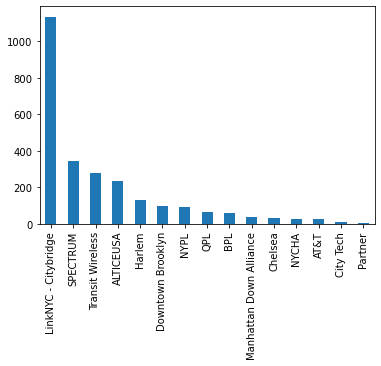

In [32]:
df_wifi2['Provider'].value_counts().plot(kind = 'bar')
#LinkNYC - Citybridge has the maximum number of installations (more than 1000)

#### LinkNYC - Citybridge has the maximum number of installations (more than 1000)

#### 2b Plot providers vs number of free wifi hotspots.

In [33]:
df_wifi2.head()

,OBJECTID,Borough,Type,Provider,Latitude,Longitude,Location_T,City,NTACode
0,1,BK,Limited Free,ALTICEUSA,40.658,-73.944,Outdoor,Brooklyn,BK60
1,2,BK,Limited Free,ALTICEUSA,40.658,-73.947,Outdoor,Brooklyn,BK60
2,3,BK,Limited Free,ALTICEUSA,40.658,-73.947,Outdoor,Brooklyn,BK60
3,4,BK,Limited Free,ALTICEUSA,40.657,-73.947,Outdoor,Brooklyn,BK60
4,5,BK,Limited Free,ALTICEUSA,40.657,-73.947,Outdoor,Brooklyn,BK60


In [34]:
df_wifi2['Type'].value_counts()

Free            1983
Limited Free     581
Partner Site       2
Name: Type, dtype: int64

In [63]:
#Creating and updating a free flag colum
df_wifi2['free_flag'] = np.where(df_wifi2['Type']== 'Free', 1 , 0)


In [65]:
df_wifi2['free_flag'].value_counts()

1    1983
0     583
Name: free_flag, dtype: int64

In [66]:
df_wifi2['free_flag'].value_counts()

1    1983
0     583
Name: free_flag, dtype: int64

<AxesSubplot:xlabel='Provider'>

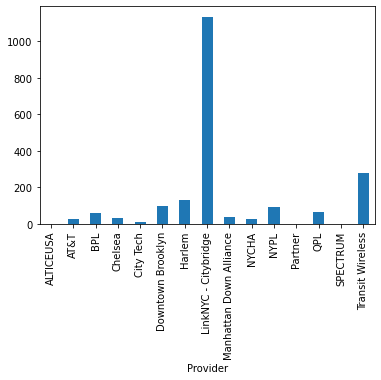

In [69]:
df_wifi2.groupby('Provider')['free_flag'].sum().plot(kind = 'bar')


#### 2b. Plot shared above.Thus for Free wifi spots also, 'LinkNYC - Citybridge remains the top provider

#### 2c. Are there any provider(s) who do not provide free wifi?

In [82]:
#We can shortlist those providers using either the free_flag column or the type column

series_free_sum = df_wifi2.groupby('Provider')['free_flag'].sum()

list1 = list(series_free_sum[series_free_sum == 0].index)

print('The providers with no free wifi are {a}'.format (a = list1))

The providers with no free wifi are ['ALTICEUSA', 'Partner', 'SPECTRUM']


#### 2c. Are there any provider(s) who do not provide free wifi?  
ALTICEUSA, Partner and SPECTRUM  do not provide free wifi

#### 2d. Which Location type (Location_T) are most common and least common?

In [90]:
#Using idxmax method, we can retrieve the most common location type
most_common = df_wifi2['Location_T'].value_counts().idxmax()

print('The most common location type is \'{a}\''.format(a = most_common))

The most common location type is 'Outdoor Kiosk'


In [91]:
#Using idxmin method, we can retrieve the least common location type
least_common = df_wifi2['Location_T'].value_counts().idxmin()
print('The least common location type is \'{a}\''.format(a = least_common))

The least common location type is 'Outdoor TWC Aerial'


#### 2 e. How many free “indoor” and “outdoor” hotspots are there? Which companies have the highest number of Outdoor Free installations. 

In [92]:
df_wifi2['Location_T'].value_counts()

Outdoor Kiosk         1134
Outdoor                696
Subway Station         276
Library                214
Indoor                 125
Outdoor TWC Aerial     121
Name: Location_T, dtype: int64

In [98]:
#Assuming 'Subway Station' and 'Libary' also to be of indoor type
#Applying a substring check method and updating the outdoor_flag column

df_wifi2['outdoor_flag'] = np.where(df_wifi2['Location_T'].str.find('Outdoor') != -1, 1 , 0)

In [99]:
df_wifi2['outdoor_flag'].value_counts()

1    1951
0     615
Name: outdoor_flag, dtype: int64

In [103]:
#Checking if the outdoor flag has been assigned correctly or not

df_wifi2[df_wifi2['Location_T'].str.find('Outdoor') != -1 ]['outdoor_flag'].value_counts()

1    1951
Name: outdoor_flag, dtype: int64

In [104]:
df_wifi2.head()

,OBJECTID,Borough,Type,Provider,Latitude,Longitude,Location_T,City,NTACode,free_flag,outdoor_flag
0,1,BK,Limited Free,ALTICEUSA,40.658,-73.944,Outdoor,Brooklyn,BK60,0,1
1,2,BK,Limited Free,ALTICEUSA,40.658,-73.947,Outdoor,Brooklyn,BK60,0,1
2,3,BK,Limited Free,ALTICEUSA,40.658,-73.947,Outdoor,Brooklyn,BK60,0,1
3,4,BK,Limited Free,ALTICEUSA,40.657,-73.947,Outdoor,Brooklyn,BK60,0,1
4,5,BK,Limited Free,ALTICEUSA,40.657,-73.947,Outdoor,Brooklyn,BK60,0,1


In [114]:
#Checking free indoor

bool_free_indoor = (df_wifi2['free_flag'] == 1) & (df_wifi2['outdoor_flag'] ==0)


free_indoor_count = df_wifi2.loc[bool_free_indoor,'OBJECTID'].count()

print('The count of free indoor hotspots is ' + str(free_indoor_count))


The count of free indoor hotspots is 490


In [115]:
#Checking free outdoor

bool_free_outdoor = (df_wifi2['free_flag'] == 1) & (df_wifi2['outdoor_flag'] ==1)

free_outdoor_count = df_wifi2.loc[bool_free_outdoor,'OBJECTID'].count()

print('The count of free outdoor hotspots is ' + str(free_outdoor_count))

The count of free outdoor hotspots is 1493


<AxesSubplot:>

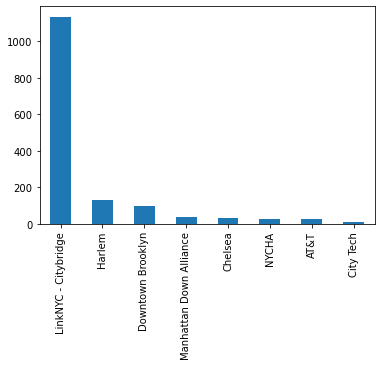

In [119]:
#Checking which companies have the highest number of Outdoor Free installations. 

df_free_outdoor = df_wifi2[bool_free_outdoor]
df_free_outdoor['Provider'].value_counts().plot(kind = 'bar')

In [124]:
df_free_outdoor['Provider'].value_counts()

LinkNYC - Citybridge       1134
Harlem                      128
Downtown Brooklyn           100
Manhattan Down Alliance      36
Chelsea                      30
NYCHA                        28
AT&T                         26
City Tech                    11
Name: Provider, dtype: int64

In [125]:
print('Thus the top 3 free outdoor providers are LinkNYC - Citybridge, Harlem and Downtown Brooklyn  ')

Thus the top 3 free outdoor providers are LinkNYC - Citybridge, Harlem and Downtown Brooklyn  
